# Experimento: MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from src.network import NeuralNetwork
from src.optimizers import Adam, SGD
from src.trainer import Trainer
from src.utils import (
    split_data, one_hot, fit_minmax, transform_minmax, accuracy,
    plot_curves, confusion_matrix, plot_confusion_matrix, show_predictions
)

from data.mnist_loader import download_and_load_mnist

In [2]:
X, y = download_and_load_mnist(data_subdir="mnist", cache_npz=True)
num_classes = 10

(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_data(
    X, y, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2, random_seed=42, shuffle=True
)

y_train_oh = one_hot(y_train, num_classes)
y_val_oh   = one_hot(y_val,   num_classes)
y_test_oh  = one_hot(y_test,  num_classes)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (42000, 784) Val: (14000, 784) Test: (14000, 784)


Epoch 001 | loss 0.4137 | acc 0.8777 | val_loss 0.22038208287756922 | val_acc 0.9357142857142857
Epoch 002 | loss 0.1731 | acc 0.9485 | val_loss 0.15897523550424508 | val_acc 0.9534285714285714
Epoch 003 | loss 0.1262 | acc 0.9623 | val_loss 0.13405327071537956 | val_acc 0.9601428571428572
Epoch 004 | loss 0.1001 | acc 0.9700 | val_loss 0.11905055325108126 | val_acc 0.9642857142857143
Epoch 005 | loss 0.0825 | acc 0.9738 | val_loss 0.1102122749619015 | val_acc 0.9679285714285715
Epoch 006 | loss 0.0683 | acc 0.9791 | val_loss 0.10681558552782096 | val_acc 0.9677142857142857
Epoch 007 | loss 0.0605 | acc 0.9806 | val_loss 0.10836011680669363 | val_acc 0.9676428571428571
Epoch 008 | loss 0.0543 | acc 0.9825 | val_loss 0.10279583101858972 | val_acc 0.9696428571428571
Epoch 009 | loss 0.0472 | acc 0.9851 | val_loss 0.09557603500541825 | val_acc 0.9725714285714285
Epoch 010 | loss 0.0441 | acc 0.9857 | val_loss 0.10259018540792827 | val_acc 0.9695
Epoch 011 | loss 0.0412 | acc 0.9865 | val_

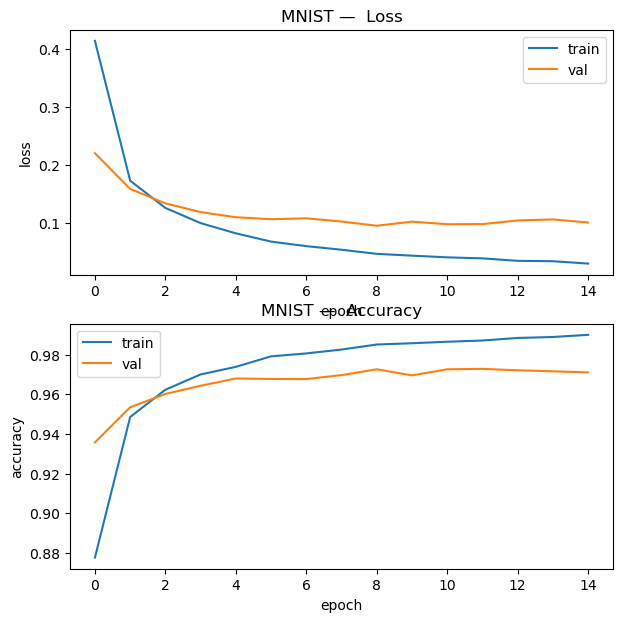

In [ ]:

architecture = [784, 256, 128, 10]
activations = ['relu', 'relu', 'softmax']
dropout_rates = [0.2, 0.2, 0.0]

optimizer = Adam(lr=1e-3, weight_decay=1e-4)

net = NeuralNetwork(architecture, activations, dropout_rates=None)
trainer = Trainer(net, optimizer, loss='cross_entropy')

history = trainer.train(
    X_train, y_train_oh,
    X_val=X_val, y_val=y_val_oh,
    epochs=15,
    batch_size=128,
    classification=True,
    verbose=True,
    early_stopping=False,
    patience=5,
    min_delta=1e-4
)

plot_curves(history, title_prefix='MNIST — ')

Accuracy en test: 0.9775


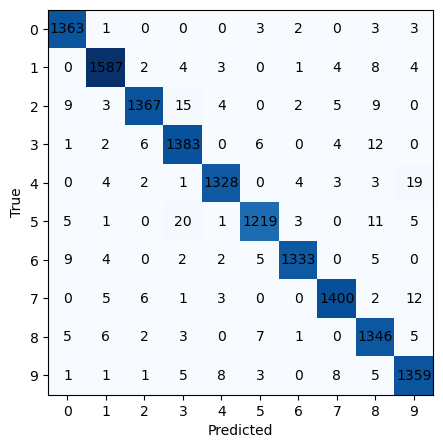

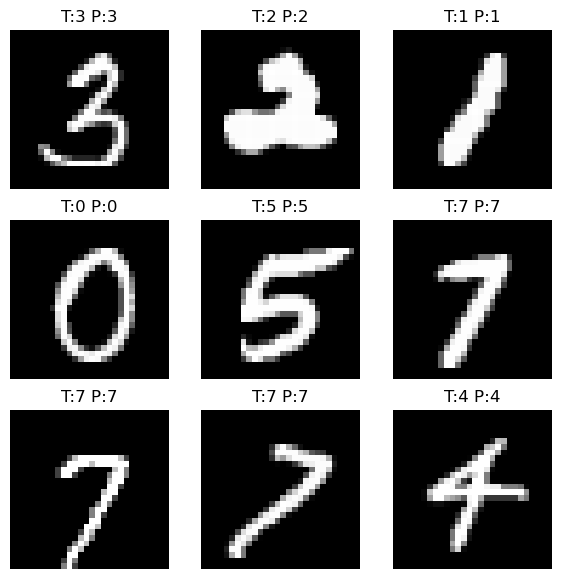

In [7]:
probs_test = net.forward(X_test)
test_acc = accuracy(y_test_oh, probs_test)
y_pred = np.argmax(probs_test, axis=1)
cm = confusion_matrix(y_test_oh, probs_test, num_classes)
print('Accuracy en test:', float(test_acc))
plot_confusion_matrix(cm, [str(i) for i in range(10)])
show_predictions(X_test[:9], np.argmax(y_test_oh[:9],1), np.argmax(probs_test[:9],1), [str(i) for i in range(10)])